In \[1\]:

    import pandas as pd
    import numpy as np
    import tensorflow as tf
    from tensorflow import keras

    2022-08-10 11:05:10.094713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
    2022-08-10 11:05:10.094738: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

In \[2\]:

    df=pd.read_csv("/home/divum/ML/DATASETS/Churn_Modelling.csv")

In \[3\]:

    df

Out\[3\]:

|      | RowNumber | CustomerId | Surname   | CreditScore | Geography | Gender | Age | Tenure | Balance   | NumOfProducts | HasCrCard | IsActiveMember | EstimatedSalary | Exited |
|------|-----------|------------|-----------|-------------|-----------|--------|-----|--------|-----------|---------------|-----------|----------------|-----------------|--------|
| 0    | 1         | 15634602   | Hargrave  | 619         | France    | Female | 42  | 2      | 0.00      | 1             | 1         | 1              | 101348.88       | 1      |
| 1    | 2         | 15647311   | Hill      | 608         | Spain     | Female | 41  | 1      | 83807.86  | 1             | 0         | 1              | 112542.58       | 0      |
| 2    | 3         | 15619304   | Onio      | 502         | France    | Female | 42  | 8      | 159660.80 | 3             | 1         | 0              | 113931.57       | 1      |
| 3    | 4         | 15701354   | Boni      | 699         | France    | Female | 39  | 1      | 0.00      | 2             | 0         | 0              | 93826.63        | 0      |
| 4    | 5         | 15737888   | Mitchell  | 850         | Spain     | Female | 43  | 2      | 125510.82 | 1             | 1         | 1              | 79084.10        | 0      |
| ...  | ...       | ...        | ...       | ...         | ...       | ...    | ... | ...    | ...       | ...           | ...       | ...            | ...             | ...    |
| 9995 | 9996      | 15606229   | Obijiaku  | 771         | France    | Male   | 39  | 5      | 0.00      | 2             | 1         | 0              | 96270.64        | 0      |
| 9996 | 9997      | 15569892   | Johnstone | 516         | France    | Male   | 35  | 10     | 57369.61  | 1             | 1         | 1              | 101699.77       | 0      |
| 9997 | 9998      | 15584532   | Liu       | 709         | France    | Female | 36  | 7      | 0.00      | 1             | 0         | 1              | 42085.58        | 1      |
| 9998 | 9999      | 15682355   | Sabbatini | 772         | Germany   | Male   | 42  | 3      | 75075.31  | 2             | 1         | 0              | 92888.52        | 1      |
| 9999 | 10000     | 15628319   | Walker    | 792         | France    | Female | 28  | 4      | 130142.79 | 1             | 1         | 0              | 38190.78        | 0      |

10000 rows × 14 columns

In \[6\]:

    # df.drop('CustomerId',axis='columns',inplace=True)
    df.drop('RowNumber',axis='columns',inplace=True)
    df.drop('Surname',axis='columns',inplace=True)

In \[7\]:

    df

Out\[7\]:

|      | CreditScore | Geography | Gender | Age | Tenure | Balance   | NumOfProducts | HasCrCard | IsActiveMember | EstimatedSalary | Exited |
|------|-------------|-----------|--------|-----|--------|-----------|---------------|-----------|----------------|-----------------|--------|
| 0    | 619         | France    | Female | 42  | 2      | 0.00      | 1             | 1         | 1              | 101348.88       | 1      |
| 1    | 608         | Spain     | Female | 41  | 1      | 83807.86  | 1             | 0         | 1              | 112542.58       | 0      |
| 2    | 502         | France    | Female | 42  | 8      | 159660.80 | 3             | 1         | 0              | 113931.57       | 1      |
| 3    | 699         | France    | Female | 39  | 1      | 0.00      | 2             | 0         | 0              | 93826.63        | 0      |
| 4    | 850         | Spain     | Female | 43  | 2      | 125510.82 | 1             | 1         | 1              | 79084.10        | 0      |
| ...  | ...         | ...       | ...    | ... | ...    | ...       | ...           | ...       | ...            | ...             | ...    |
| 9995 | 771         | France    | Male   | 39  | 5      | 0.00      | 2             | 1         | 0              | 96270.64        | 0      |
| 9996 | 516         | France    | Male   | 35  | 10     | 57369.61  | 1             | 1         | 1              | 101699.77       | 0      |
| 9997 | 709         | France    | Female | 36  | 7      | 0.00      | 1             | 0         | 1              | 42085.58        | 1      |
| 9998 | 772         | Germany   | Male   | 42  | 3      | 75075.31  | 2             | 1         | 0              | 92888.52        | 1      |
| 9999 | 792         | France    | Female | 28  | 4      | 130142.79 | 1             | 1         | 0              | 38190.78        | 0      |

10000 rows × 11 columns

In \[8\]:

    df.dtypes

Out\[8\]:

    CreditScore          int64
    Geography           object
    Gender              object
    Age                  int64
    Tenure               int64
    Balance            float64
    NumOfProducts        int64
    HasCrCard            int64
    IsActiveMember       int64
    EstimatedSalary    float64
    Exited               int64
    dtype: object

In \[9\]:

    df.CreditScore.unique()

Out\[9\]:

    array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
           549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
           571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
           465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
           656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
           738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
           493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
           710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
           668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
           579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
           631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
           778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
           689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
           763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 681, 544,
           696, 766, 727, 693, 557, 531, 498, 651, 791, 733, 811, 707, 714,
           782, 775, 799, 602, 744, 588, 747, 583, 627, 731, 629, 438, 642,
           806, 474, 559, 429, 680, 749, 734, 644, 626, 649, 805, 718, 840,
           630, 654, 762, 568, 613, 522, 737, 648, 443, 640, 540, 460, 593,
           801, 611, 802, 745, 483, 690, 492, 709, 705, 560, 752, 701, 537,
           487, 596, 702, 486, 724, 548, 464, 790, 534, 748, 494, 590, 468,
           509, 818, 816, 536, 753, 774, 621, 569, 658, 798, 641, 542, 692,
           639, 765, 570, 638, 599, 632, 779, 527, 564, 833, 504, 842, 508,
           417, 598, 741, 607, 761, 848, 546, 439, 755, 760, 526, 713, 700,
           666, 566, 495, 688, 612, 477, 427, 839, 819, 720, 459, 503, 624,
           529, 563, 482, 796, 445, 746, 786, 554, 672, 787, 499, 844, 450,
           815, 838, 803, 736, 633, 600, 679, 517, 792, 743, 488, 421, 841,
           708, 507, 505, 456, 435, 561, 518, 565, 728, 784, 552, 609, 764,
           697, 723, 551, 444, 719, 496, 541, 830, 812, 677, 420, 595, 617,
           809, 500, 826, 434, 513, 478, 797, 363, 399, 463, 780, 452, 575,
           837, 794, 824, 428, 823, 781, 849, 489, 431, 457, 768, 831, 359,
           820, 573, 576, 558, 817, 449, 440, 415, 821, 530, 350, 446, 425,
           740, 481, 783, 358, 845, 451, 458, 469, 423, 404, 836, 473, 835,
           466, 491, 351, 827, 843, 365, 532, 414, 453, 471, 401, 810, 832,
           470, 447, 422, 825, 430, 436, 426, 408, 847, 418, 437, 410, 454,
           407, 455, 462, 386, 405, 383, 395, 467, 433, 442, 424, 448, 441,
           367, 412, 382, 373, 419])

In \[10\]:

    df.Geography.unique()

Out\[10\]:

    array(['France', 'Spain', 'Germany'], dtype=object)

In \[13\]:

    def uni(d):
        for col in d:
            if df[col].dtypes=='object':
                print(col,":",d[col].unique())

In \[14\]:

    uni(df)

    Geography : ['France' 'Spain' 'Germany']
    Gender : ['Female' 'Male']

In \[17\]:

    df.replace({'Female':0,'Male':1},inplace=True)
    df.replace({'France':0,'Spain':1,'Germany':2},inplace=True)

In \[20\]:

    df.isnull().sum()

Out\[20\]:

    CreditScore        0
    Geography          0
    Gender             0
    Age                0
    Tenure             0
    Balance            0
    NumOfProducts      0
    HasCrCard          0
    IsActiveMember     0
    EstimatedSalary    0
    Exited             0
    dtype: int64

In \[21\]:

    for col in df:
        print(col,":",df[col].unique())

    CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
     726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
     804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
     511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
     757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
     814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
     432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
     716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
     514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
     567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
     681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
     602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
     626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
     801 611 802 745 483 690 492 709 705 560 752 701 537 487 596 702 486 724
     548 464 790 534 748 494 590 468 509 818 816 536 753 774 621 569 658 798
     641 542 692 639 765 570 638 599 632 779 527 564 833 504 842 508 417 598
     741 607 761 848 546 439 755 760 526 713 700 666 566 495 688 612 477 427
     839 819 720 459 503 624 529 563 482 796 445 746 786 554 672 787 499 844
     450 815 838 803 736 633 600 679 517 792 743 488 421 841 708 507 505 456
     435 561 518 565 728 784 552 609 764 697 723 551 444 719 496 541 830 812
     677 420 595 617 809 500 826 434 513 478 797 363 399 463 780 452 575 837
     794 824 428 823 781 849 489 431 457 768 831 359 820 573 576 558 817 449
     440 415 821 530 350 446 425 740 481 783 358 845 451 458 469 423 404 836
     473 835 466 491 351 827 843 365 532 414 453 471 401 810 832 470 447 422
     825 430 436 426 408 847 418 437 410 454 407 455 462 386 405 383 395 467
     433 442 424 448 441 367 412 382 373 419]
    Geography : [0 1 2]
    Gender : [0 1]
    Age : [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
     37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
     80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
    Tenure : [ 2  1  8  7  4  6  3 10  5  9  0]
    Balance : [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
    NumOfProducts : [1 3 2 4]
    HasCrCard : [1 0]
    IsActiveMember : [1 0]
    EstimatedSalary : [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
    Exited : [1 0]

In \[22\]:

    df.dtypes

Out\[22\]:

    CreditScore          int64
    Geography            int64
    Gender               int64
    Age                  int64
    Tenure               int64
    Balance            float64
    NumOfProducts        int64
    HasCrCard            int64
    IsActiveMember       int64
    EstimatedSalary    float64
    Exited               int64
    dtype: object

In \[27\]:

    col_to_scale=["CreditScore","Balance","EstimatedSalary","Balance"]
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    df[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In \[28\]:

    df

Out\[28\]:

|      | CreditScore | Geography | Gender | Age | Tenure | Balance  | NumOfProducts | HasCrCard | IsActiveMember | EstimatedSalary | Exited |
|------|-------------|-----------|--------|-----|--------|----------|---------------|-----------|----------------|-----------------|--------|
| 0    | 0.538       | 0         | 0      | 42  | 2      | 0.000000 | 1             | 1         | 1              | 0.506735        | 1      |
| 1    | 0.516       | 1         | 0      | 41  | 1      | 0.334031 | 1             | 0         | 1              | 0.562709        | 0      |
| 2    | 0.304       | 0         | 0      | 42  | 8      | 0.636357 | 3             | 1         | 0              | 0.569654        | 1      |
| 3    | 0.698       | 0         | 0      | 39  | 1      | 0.000000 | 2             | 0         | 0              | 0.469120        | 0      |
| 4    | 1.000       | 1         | 0      | 43  | 2      | 0.500246 | 1             | 1         | 1              | 0.395400        | 0      |
| ...  | ...         | ...       | ...    | ... | ...    | ...      | ...           | ...       | ...            | ...             | ...    |
| 9995 | 0.842       | 0         | 1      | 39  | 5      | 0.000000 | 2             | 1         | 0              | 0.481341        | 0      |
| 9996 | 0.332       | 0         | 1      | 35  | 10     | 0.228657 | 1             | 1         | 1              | 0.508490        | 0      |
| 9997 | 0.718       | 0         | 0      | 36  | 7      | 0.000000 | 1             | 0         | 1              | 0.210390        | 1      |
| 9998 | 0.844       | 2         | 1      | 42  | 3      | 0.299226 | 2             | 1         | 0              | 0.464429        | 1      |
| 9999 | 0.884       | 0         | 0      | 28  | 4      | 0.518708 | 1             | 1         | 0              | 0.190914        | 0      |

10000 rows × 11 columns

In \[29\]:

    for col in df:
        print(col,":",df[col].unique())

    CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
     0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
     0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
     0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
     0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
     0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
     0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
     0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
     0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
     0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
     0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
     0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
     0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
     0.678 0.54  0.652 0.444 0.69  0.484 0.434 0.688 0.394 0.488 0.646 0.52
     0.834 0.826 0.724 0.706 0.624 0.618 0.346 0.844 0.39  0.568 0.778 0.842
     0.662 0.388 0.692 0.832 0.754 0.686 0.414 0.362 0.296 0.602 0.882 0.766
     0.922 0.714 0.728 0.864 0.85  0.898 0.504 0.788 0.476 0.794 0.466 0.554
     0.762 0.558 0.176 0.584 0.912 0.248 0.418 0.158 0.66  0.798 0.768 0.588
     0.552 0.598 0.91  0.736 0.98  0.56  0.608 0.824 0.436 0.526 0.344 0.774
     0.596 0.186 0.58  0.38  0.22  0.486 0.902 0.522 0.904 0.79  0.266 0.68
     0.284 0.718 0.71  0.42  0.804 0.702 0.374 0.274 0.492 0.704 0.272 0.748
     0.396 0.228 0.88  0.368 0.796 0.288 0.48  0.236 0.318 0.936 0.932 0.372
     0.806 0.848 0.542 0.438 0.616 0.896 0.582 0.384 0.684 0.578 0.83  0.44
     0.576 0.498 0.564 0.858 0.354 0.428 0.966 0.308 0.984 0.316 0.134 0.496
     0.782 0.514 0.822 0.996 0.392 0.178 0.81  0.82  0.352 0.726 0.7   0.632
     0.432 0.29  0.676 0.524 0.254 0.154 0.978 0.938 0.74  0.218 0.306 0.548
     0.358 0.426 0.264 0.892 0.19  0.792 0.872 0.408 0.644 0.874 0.298 0.988
     0.2   0.93  0.976 0.906 0.772 0.566 0.5   0.658 0.334 0.884 0.786 0.276
     0.142 0.982 0.716 0.314 0.31  0.212 0.17  0.422 0.336 0.43  0.756 0.868
     0.404 0.518 0.828 0.694 0.746 0.402 0.188 0.738 0.292 0.382 0.96  0.924
     0.654 0.14  0.49  0.534 0.918 0.3   0.952 0.168 0.326 0.256 0.894 0.026
     0.098 0.226 0.86  0.204 0.45  0.974 0.888 0.948 0.156 0.946 0.862 0.998
     0.278 0.162 0.214 0.836 0.962 0.018 0.94  0.446 0.452 0.416 0.934 0.198
     0.18  0.13  0.942 0.36  0.    0.192 0.15  0.78  0.262 0.866 0.016 0.99
     0.202 0.216 0.238 0.146 0.108 0.972 0.246 0.97  0.232 0.282 0.002 0.954
     0.986 0.03  0.364 0.128 0.206 0.242 0.102 0.92  0.964 0.24  0.194 0.144
     0.95  0.16  0.172 0.152 0.116 0.994 0.136 0.174 0.12  0.208 0.114 0.21
     0.224 0.072 0.11  0.066 0.09  0.234 0.166 0.184 0.148 0.196 0.182 0.034
     0.124 0.064 0.046 0.138]
    Geography : [0 1 2]
    Gender : [0 1]
    Age : [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
     37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
     80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
    Tenure : [ 2  1  8  7  4  6  3 10  5  9  0]
    Balance : [0.         0.33403148 0.63635718 ... 0.22865702 0.29922631 0.51870777]
    NumOfProducts : [1 3 2 4]
    HasCrCard : [1 0]
    IsActiveMember : [1 0]
    EstimatedSalary : [0.50673489 0.56270874 0.56965435 ... 0.21039009 0.46442905 0.19091423]
    Exited : [1 0]

In \[30\]:

    x=df.drop("Exited",axis='columns')
    y=df["Exited"]

In \[31\]:

    x

Out\[31\]:

|      | CreditScore | Geography | Gender | Age | Tenure | Balance  | NumOfProducts | HasCrCard | IsActiveMember | EstimatedSalary |
|------|-------------|-----------|--------|-----|--------|----------|---------------|-----------|----------------|-----------------|
| 0    | 0.538       | 0         | 0      | 42  | 2      | 0.000000 | 1             | 1         | 1              | 0.506735        |
| 1    | 0.516       | 1         | 0      | 41  | 1      | 0.334031 | 1             | 0         | 1              | 0.562709        |
| 2    | 0.304       | 0         | 0      | 42  | 8      | 0.636357 | 3             | 1         | 0              | 0.569654        |
| 3    | 0.698       | 0         | 0      | 39  | 1      | 0.000000 | 2             | 0         | 0              | 0.469120        |
| 4    | 1.000       | 1         | 0      | 43  | 2      | 0.500246 | 1             | 1         | 1              | 0.395400        |
| ...  | ...         | ...       | ...    | ... | ...    | ...      | ...           | ...       | ...            | ...             |
| 9995 | 0.842       | 0         | 1      | 39  | 5      | 0.000000 | 2             | 1         | 0              | 0.481341        |
| 9996 | 0.332       | 0         | 1      | 35  | 10     | 0.228657 | 1             | 1         | 1              | 0.508490        |
| 9997 | 0.718       | 0         | 0      | 36  | 7      | 0.000000 | 1             | 0         | 1              | 0.210390        |
| 9998 | 0.844       | 2         | 1      | 42  | 3      | 0.299226 | 2             | 1         | 0              | 0.464429        |
| 9999 | 0.884       | 0         | 0      | 28  | 4      | 0.518708 | 1             | 1         | 0              | 0.190914        |

10000 rows × 10 columns

In \[32\]:

    y

Out\[32\]:

    0       1
    1       0
    2       1
    3       0
    4       0
           ..
    9995    0
    9996    0
    9997    1
    9998    1
    9999    0
    Name: Exited, Length: 10000, dtype: int64

In \[33\]:

    from sklearn.model_selection import train_test_split

In \[34\]:

    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=28)

In \[35\]:

    xtrain.shape

Out\[35\]:

    (8000, 10)

In \[36\]:

    xtest.shape

Out\[36\]:

    (2000, 10)

In \[37\]:

    ytrain.shape

Out\[37\]:

    (8000,)

In \[38\]:

    ytest.shape

Out\[38\]:

    (2000,)

In \[43\]:

    model=keras.Sequential([
        keras.layers.Dense(10,input_shape=(10,),activation='relu'),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(1,activation="sigmoid")
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    model.fit(xtrain,ytrain,epochs=100)

    Epoch 1/100
    250/250 [==============================] - 0s 932us/step - loss: 0.5244 - accuracy: 0.7946
    Epoch 2/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7977
    Epoch 3/100
    250/250 [==============================] - 0s 989us/step - loss: 0.4575 - accuracy: 0.8008
    Epoch 4/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8039
    Epoch 5/100
    250/250 [==============================] - 0s 971us/step - loss: 0.4435 - accuracy: 0.8076
    Epoch 6/100
    250/250 [==============================] - 0s 950us/step - loss: 0.4427 - accuracy: 0.8080
    Epoch 7/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8101
    Epoch 8/100
    250/250 [==============================] - 0s 996us/step - loss: 0.4426 - accuracy: 0.8101
    Epoch 9/100
    250/250 [==============================] - 0s 947us/step - loss: 0.4403 - accuracy: 0.8084
    Epoch 10/100
    250/250 [==============================] - 0s 945us/step - loss: 0.4385 - accuracy: 0.8102
    Epoch 11/100
    250/250 [==============================] - 0s 914us/step - loss: 0.4356 - accuracy: 0.8114
    Epoch 12/100
    250/250 [==============================] - 0s 967us/step - loss: 0.4376 - accuracy: 0.8091
    Epoch 13/100
    250/250 [==============================] - 0s 922us/step - loss: 0.4371 - accuracy: 0.8089
    Epoch 14/100
    250/250 [==============================] - 0s 959us/step - loss: 0.4332 - accuracy: 0.8123
    Epoch 15/100
    250/250 [==============================] - 0s 953us/step - loss: 0.4304 - accuracy: 0.8135
    Epoch 16/100
    250/250 [==============================] - 0s 951us/step - loss: 0.4300 - accuracy: 0.8144
    Epoch 17/100
    250/250 [==============================] - 0s 905us/step - loss: 0.4262 - accuracy: 0.8131
    Epoch 18/100
    250/250 [==============================] - 0s 955us/step - loss: 0.4237 - accuracy: 0.8130
    Epoch 19/100
    250/250 [==============================] - 0s 914us/step - loss: 0.4190 - accuracy: 0.8163
    Epoch 20/100
    250/250 [==============================] - 0s 965us/step - loss: 0.4126 - accuracy: 0.8229
    Epoch 21/100
    250/250 [==============================] - 0s 906us/step - loss: 0.4043 - accuracy: 0.8278
    Epoch 22/100
    250/250 [==============================] - 0s 904us/step - loss: 0.4019 - accuracy: 0.8294
    Epoch 23/100
    250/250 [==============================] - 0s 964us/step - loss: 0.3946 - accuracy: 0.8313
    Epoch 24/100
    250/250 [==============================] - 0s 924us/step - loss: 0.3904 - accuracy: 0.8303
    Epoch 25/100
    250/250 [==============================] - 0s 919us/step - loss: 0.3890 - accuracy: 0.8325
    Epoch 26/100
    250/250 [==============================] - 0s 908us/step - loss: 0.3858 - accuracy: 0.8331
    Epoch 27/100
    250/250 [==============================] - 0s 914us/step - loss: 0.3845 - accuracy: 0.8330
    Epoch 28/100
    250/250 [==============================] - 0s 924us/step - loss: 0.3845 - accuracy: 0.8347
    Epoch 29/100
    250/250 [==============================] - 0s 938us/step - loss: 0.3785 - accuracy: 0.8370
    Epoch 30/100
    250/250 [==============================] - 0s 968us/step - loss: 0.3795 - accuracy: 0.8370
    Epoch 31/100
    250/250 [==============================] - 0s 931us/step - loss: 0.3775 - accuracy: 0.8338
    Epoch 32/100
    250/250 [==============================] - 0s 928us/step - loss: 0.3751 - accuracy: 0.8349
    Epoch 33/100
    250/250 [==============================] - 0s 889us/step - loss: 0.3758 - accuracy: 0.8385
    Epoch 34/100
    250/250 [==============================] - 0s 883us/step - loss: 0.3733 - accuracy: 0.8385
    Epoch 35/100
    250/250 [==============================] - 0s 915us/step - loss: 0.3748 - accuracy: 0.8385
    Epoch 36/100
    250/250 [==============================] - 0s 978us/step - loss: 0.3709 - accuracy: 0.8418
    Epoch 37/100
    250/250 [==============================] - 0s 919us/step - loss: 0.3679 - accuracy: 0.8407
    Epoch 38/100
    250/250 [==============================] - 0s 923us/step - loss: 0.3720 - accuracy: 0.8419
    Epoch 39/100
    250/250 [==============================] - 0s 893us/step - loss: 0.3676 - accuracy: 0.8438
    Epoch 40/100
    250/250 [==============================] - 0s 949us/step - loss: 0.3676 - accuracy: 0.8426
    Epoch 41/100
    250/250 [==============================] - 0s 892us/step - loss: 0.3658 - accuracy: 0.8455
    Epoch 42/100
    250/250 [==============================] - 0s 940us/step - loss: 0.3653 - accuracy: 0.8451
    Epoch 43/100
    250/250 [==============================] - 0s 916us/step - loss: 0.3667 - accuracy: 0.8429
    Epoch 44/100
    250/250 [==============================] - 0s 988us/step - loss: 0.3614 - accuracy: 0.8474
    Epoch 45/100
    250/250 [==============================] - 0s 925us/step - loss: 0.3592 - accuracy: 0.8487
    Epoch 46/100
    250/250 [==============================] - 0s 949us/step - loss: 0.3592 - accuracy: 0.8501
    Epoch 47/100
    250/250 [==============================] - 0s 923us/step - loss: 0.3576 - accuracy: 0.8522
    Epoch 48/100
    250/250 [==============================] - 0s 903us/step - loss: 0.3579 - accuracy: 0.8506
    Epoch 49/100
    250/250 [==============================] - 0s 918us/step - loss: 0.3571 - accuracy: 0.8514
    Epoch 50/100
    250/250 [==============================] - 0s 936us/step - loss: 0.3553 - accuracy: 0.8522
    Epoch 51/100
    250/250 [==============================] - 0s 918us/step - loss: 0.3549 - accuracy: 0.8543
    Epoch 52/100
    250/250 [==============================] - 0s 925us/step - loss: 0.3525 - accuracy: 0.8546
    Epoch 53/100
    250/250 [==============================] - 0s 931us/step - loss: 0.3518 - accuracy: 0.8533
    Epoch 54/100
    250/250 [==============================] - 0s 870us/step - loss: 0.3530 - accuracy: 0.8549
    Epoch 55/100
    250/250 [==============================] - 0s 952us/step - loss: 0.3519 - accuracy: 0.8553
    Epoch 56/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8529
    Epoch 57/100
    250/250 [==============================] - 0s 936us/step - loss: 0.3503 - accuracy: 0.8555
    Epoch 58/100
    250/250 [==============================] - 0s 909us/step - loss: 0.3498 - accuracy: 0.8585
    Epoch 59/100
    250/250 [==============================] - 0s 999us/step - loss: 0.3497 - accuracy: 0.8569
    Epoch 60/100
    250/250 [==============================] - 0s 958us/step - loss: 0.3493 - accuracy: 0.8554
    Epoch 61/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8554
    Epoch 62/100
    250/250 [==============================] - 0s 986us/step - loss: 0.3478 - accuracy: 0.8584
    Epoch 63/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8571
    Epoch 64/100
    250/250 [==============================] - 0s 952us/step - loss: 0.3472 - accuracy: 0.8560
    Epoch 65/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8596
    Epoch 66/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8594
    Epoch 67/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8574
    Epoch 68/100
    250/250 [==============================] - 0s 971us/step - loss: 0.3466 - accuracy: 0.8559
    Epoch 69/100
    250/250 [==============================] - 0s 993us/step - loss: 0.3449 - accuracy: 0.8579
    Epoch 70/100
    250/250 [==============================] - 0s 938us/step - loss: 0.3473 - accuracy: 0.8553
    Epoch 71/100
    250/250 [==============================] - 0s 925us/step - loss: 0.3454 - accuracy: 0.8572
    Epoch 72/100
    250/250 [==============================] - 0s 943us/step - loss: 0.3432 - accuracy: 0.8579
    Epoch 73/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8562
    Epoch 74/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8581
    Epoch 75/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.8596
    Epoch 76/100
    250/250 [==============================] - 0s 979us/step - loss: 0.3428 - accuracy: 0.8593
    Epoch 77/100
    250/250 [==============================] - 0s 941us/step - loss: 0.3441 - accuracy: 0.8595
    Epoch 78/100
    250/250 [==============================] - 0s 930us/step - loss: 0.3437 - accuracy: 0.8575
    Epoch 79/100
    250/250 [==============================] - 0s 931us/step - loss: 0.3418 - accuracy: 0.8585
    Epoch 80/100
    250/250 [==============================] - 0s 948us/step - loss: 0.3414 - accuracy: 0.8579
    Epoch 81/100
    250/250 [==============================] - 0s 956us/step - loss: 0.3425 - accuracy: 0.8584
    Epoch 82/100
    250/250 [==============================] - 0s 945us/step - loss: 0.3412 - accuracy: 0.8605
    Epoch 83/100
    250/250 [==============================] - 0s 989us/step - loss: 0.3409 - accuracy: 0.8595
    Epoch 84/100
    250/250 [==============================] - 0s 962us/step - loss: 0.3418 - accuracy: 0.8583
    Epoch 85/100
    250/250 [==============================] - 0s 925us/step - loss: 0.3402 - accuracy: 0.8604
    Epoch 86/100
    250/250 [==============================] - 0s 905us/step - loss: 0.3395 - accuracy: 0.8577
    Epoch 87/100
    250/250 [==============================] - 0s 969us/step - loss: 0.3399 - accuracy: 0.8596
    Epoch 88/100
    250/250 [==============================] - 0s 926us/step - loss: 0.3393 - accuracy: 0.8608
    Epoch 89/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8577
    Epoch 90/100
    250/250 [==============================] - 0s 954us/step - loss: 0.3397 - accuracy: 0.8585
    Epoch 91/100
    250/250 [==============================] - 0s 936us/step - loss: 0.3383 - accuracy: 0.8608
    Epoch 92/100
    250/250 [==============================] - 0s 933us/step - loss: 0.3409 - accuracy: 0.8562
    Epoch 93/100
    250/250 [==============================] - 0s 973us/step - loss: 0.3379 - accuracy: 0.8612
    Epoch 94/100
    250/250 [==============================] - 0s 950us/step - loss: 0.3377 - accuracy: 0.8606
    Epoch 95/100
    250/250 [==============================] - 0s 981us/step - loss: 0.3372 - accuracy: 0.8615
    Epoch 96/100
    250/250 [==============================] - 0s 973us/step - loss: 0.3388 - accuracy: 0.8604
    Epoch 97/100
    250/250 [==============================] - 0s 969us/step - loss: 0.3377 - accuracy: 0.8620
    Epoch 98/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8594
    Epoch 99/100
    250/250 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8601
    Epoch 100/100
    250/250 [==============================] - 0s 950us/step - loss: 0.3377 - accuracy: 0.8611

Out\[43\]:

    <keras.callbacks.History at 0x7fab842c1540>

In \[44\]:

    model.evaluate(xtest,ytest)

    63/63 [==============================] - 0s 884us/step - loss: 0.3560 - accuracy: 0.8555

Out\[44\]:

    [0.35597389936447144, 0.8554999828338623]

In \[45\]:

    yp=model.predict(xtest)

    63/63 [==============================] - 0s 872us/step

In \[47\]:

    yp[:5]

Out\[47\]:

    array([[0.5022228 ],
           [0.09951729],
           [0.0517025 ],
           [0.05196378],
           [0.24340843]], dtype=float32)

In \[48\]:

    y_predicted=[]
    for i in yp:
        if i>0.5:
            y_predicted.append(1)
        else:
            y_predicted.append(0)

In \[49\]:

    y_predicted[:10]

Out\[49\]:

    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In \[50\]:

    ytest[:10]

Out\[50\]:

    4345    1
    5182    1
    1597    0
    4459    0
    4168    0
    1901    0
    7738    0
    1243    0
    4445    0
    8435    1
    Name: Exited, dtype: int64

In \[52\]:

    from sklearn.metrics import confusion_matrix, classification_report

In \[54\]:

    print(classification_report(y_predicted,ytest))

                  precision    recall  f1-score   support

               0       0.96      0.87      0.91      1765
               1       0.43      0.71      0.54       235

        accuracy                           0.86      2000
       macro avg       0.69      0.79      0.73      2000
    weighted avg       0.90      0.86      0.87      2000

In \[57\]:

    import seaborn as sn
    import matplotlib.pyplot as plt
    cm=tf.math.confusion_matrix(labels=ytest,predictions=y_predicted)
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, fmt='d')

Out\[57\]:

    <AxesSubplot:>

<img src="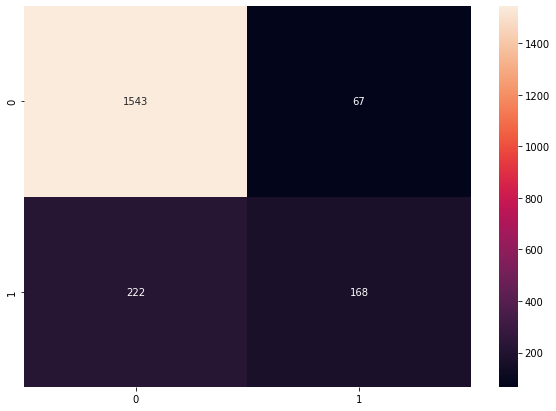%0A" class="jp-needs-light-background" />

In \[ \]: